Section 2 of my self-made machine learning course: Data cleaning, engineering, and visualization by structuring, preprocessing, and using EDA techniques. Using matplotlib and seaborn for visualization. Using the kaggle Cars4U dataset and the Titanic dataset. https://www.kaggle.com/datasets/sukhmanibedi/cars4u ,

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

7253 rows/entries
14 columns/labels
Categorical Variables:
Index(['Make', 'Model', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')
Numerical Variables:
['Year', 'Age_(Yrs)', 'Kilometers_Driven', 'Seats', 'Price']
Year
Skew : -0.84


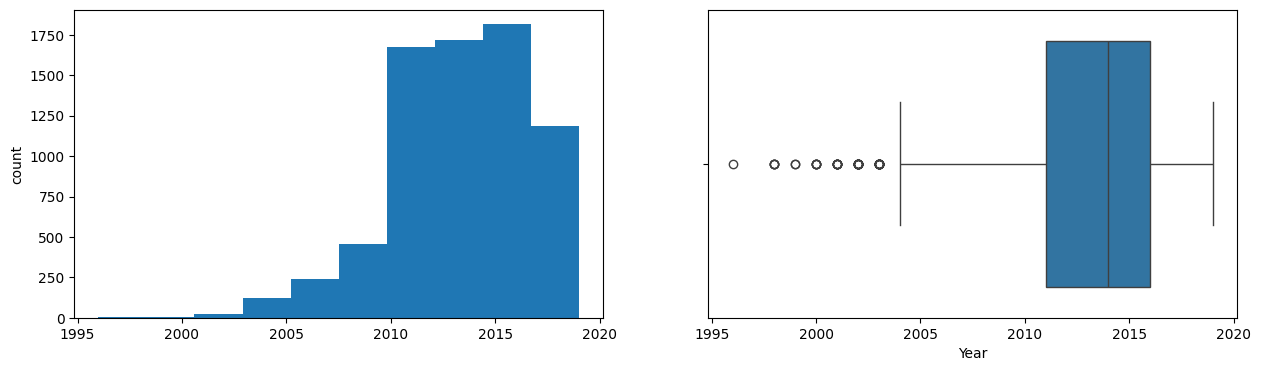

Age_(Yrs)
Skew : 0.84


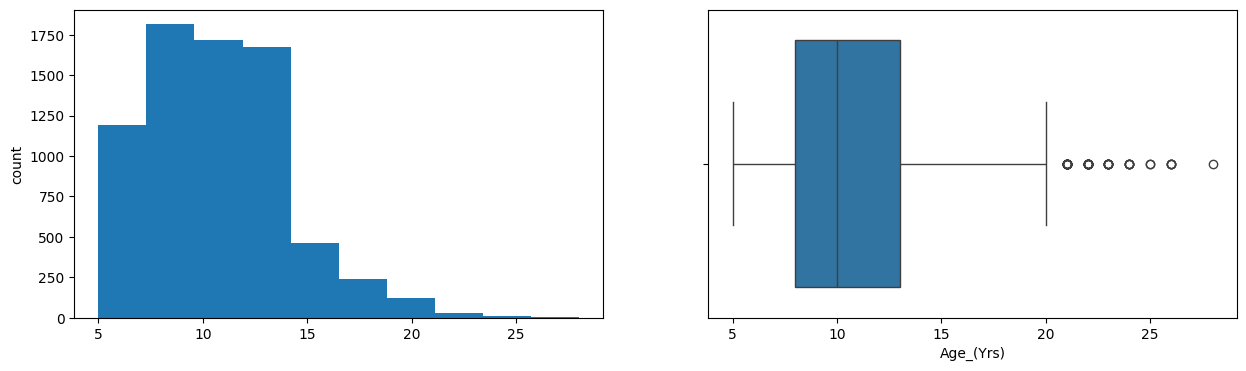

Kilometers_Driven
Skew : 61.58


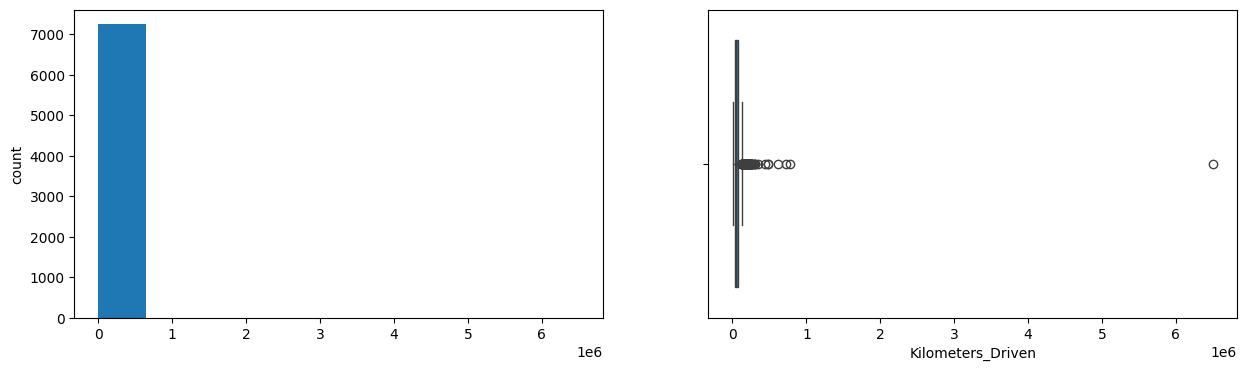

Seats
Skew : 1.9


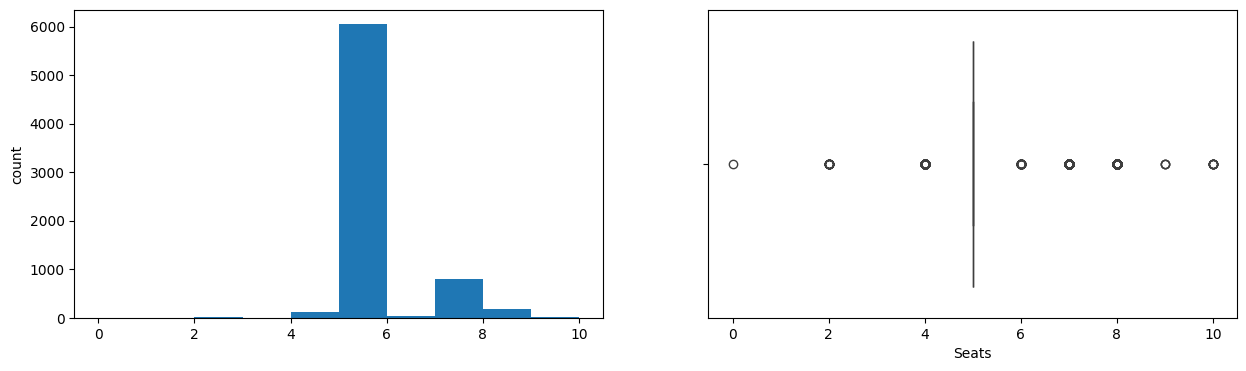

Price
Skew : 3.34


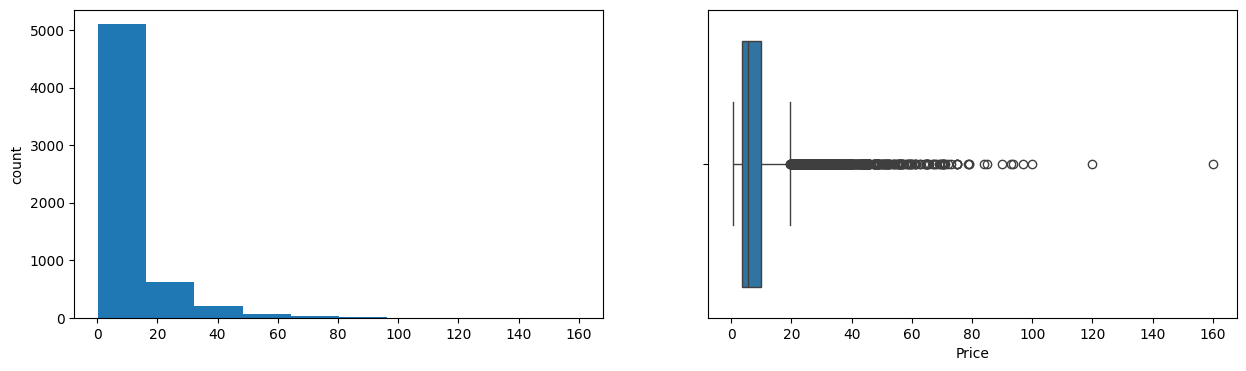

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   7253 non-null   object 
 1   Model                  7252 non-null   object 
 2   Location               7253 non-null   object 
 3   Year                   7253 non-null   int64  
 4   Age_(Yrs)              7253 non-null   int64  
 5   Kilometers_Driven      7253 non-null   int64  
 6   Fuel_Type              7253 non-null   object 
 7   Transmission           7253 non-null   object 
 8   Owner_Type             7253 non-null   object 
 9   Mileage                7251 non-null   object 
 10  Engine                 7207 non-null   object 
 11  Power                  7207 non-null   object 
 12  Seats                  7200 non-null   float64
 13  New_Price              1006 non-null   object 
 14  Price                  6019 non-null   float64
 15  Kilo

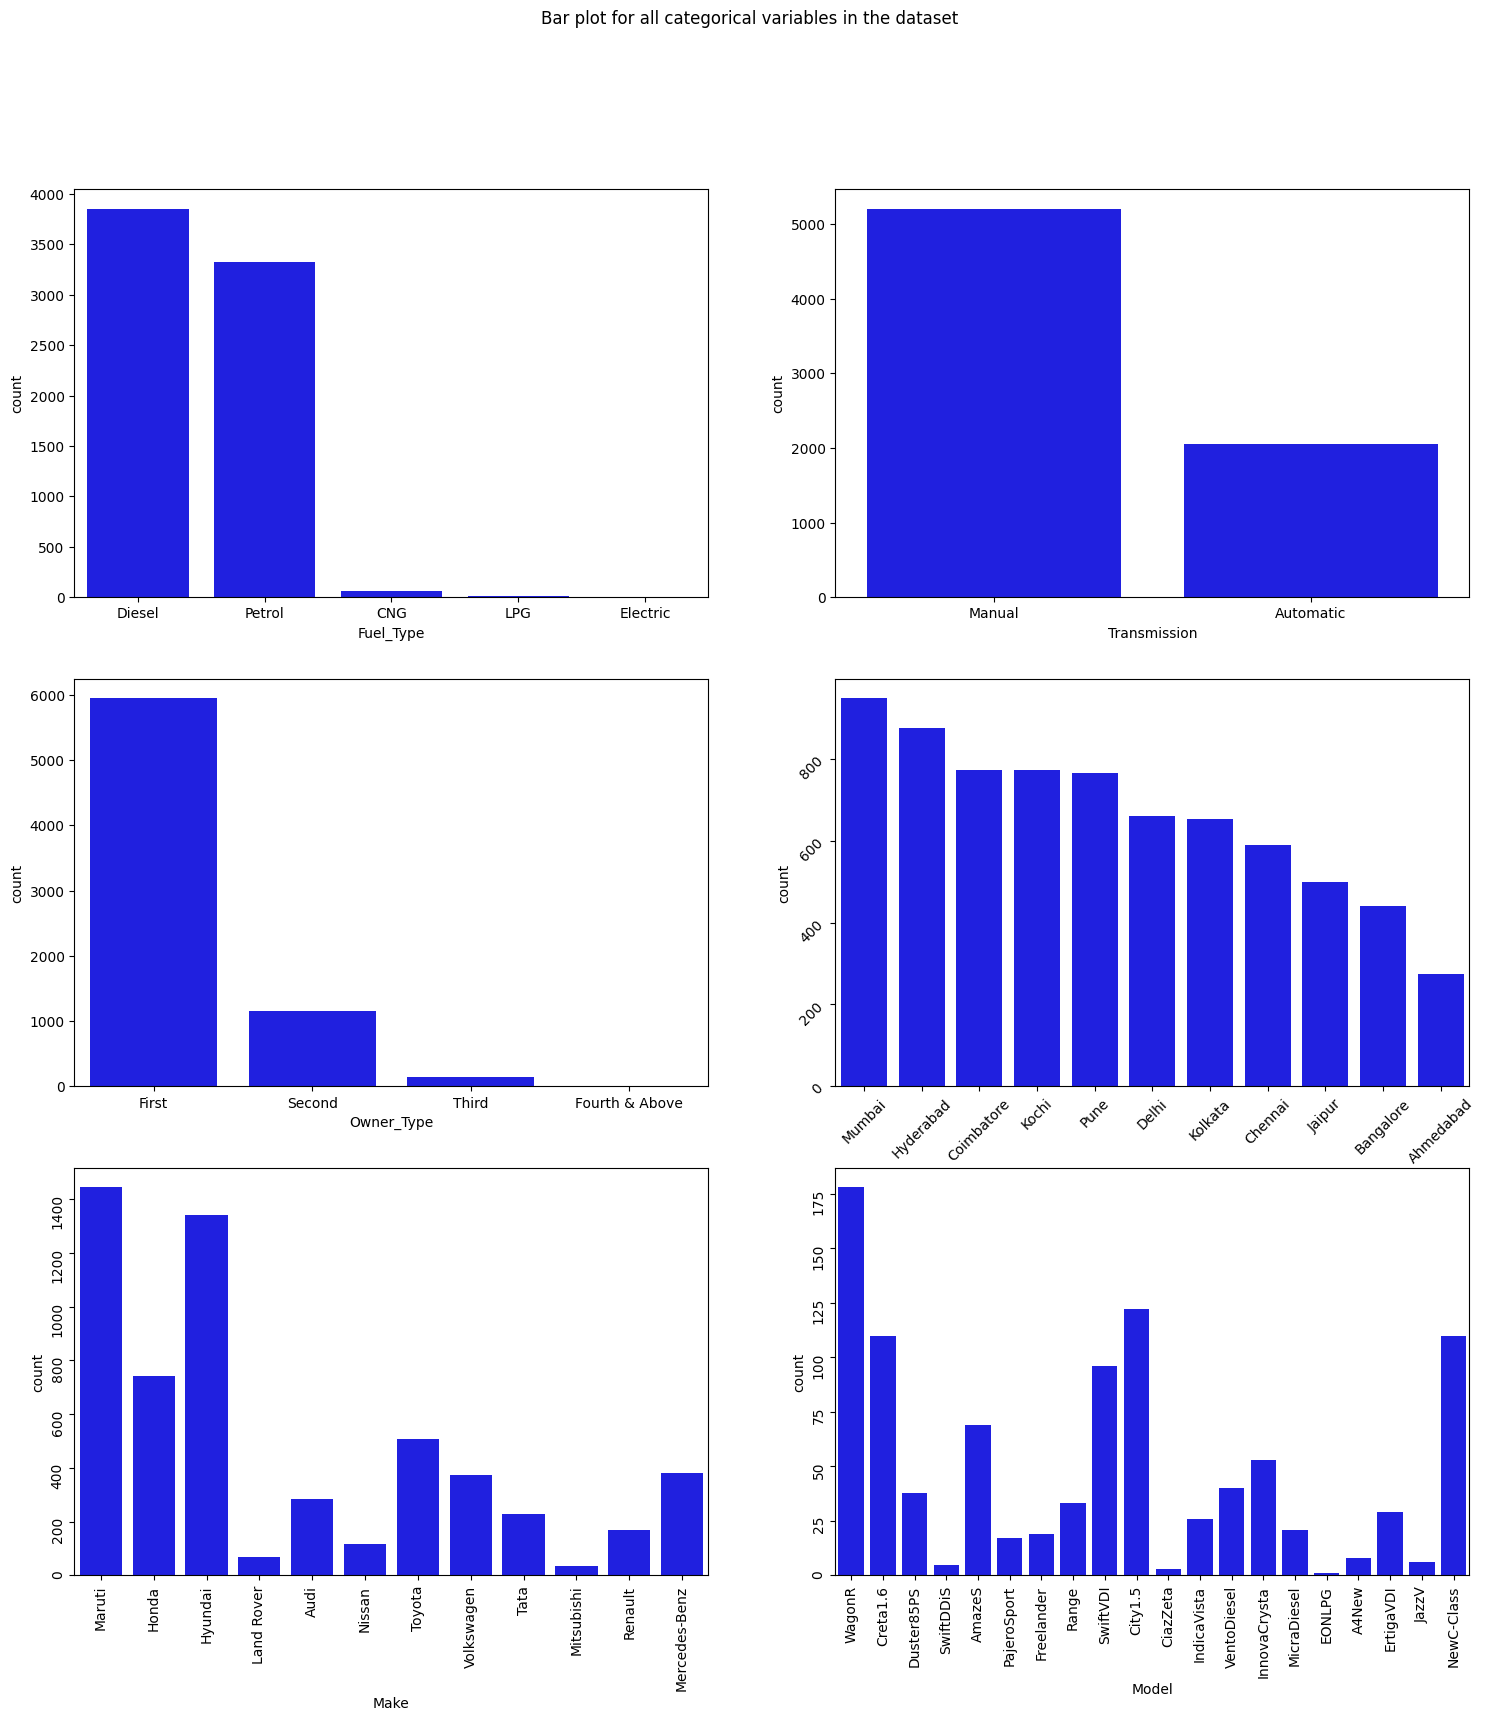

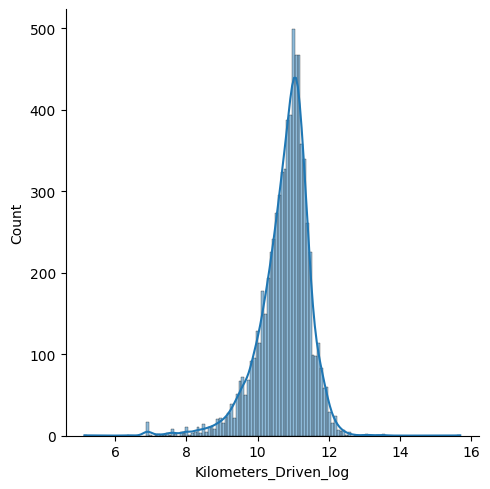

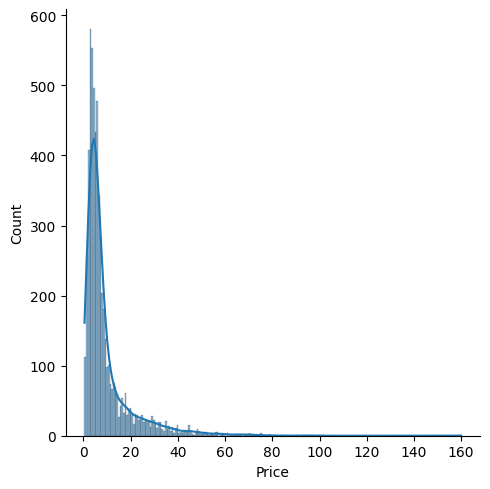

<Figure size 1300x1700 with 0 Axes>

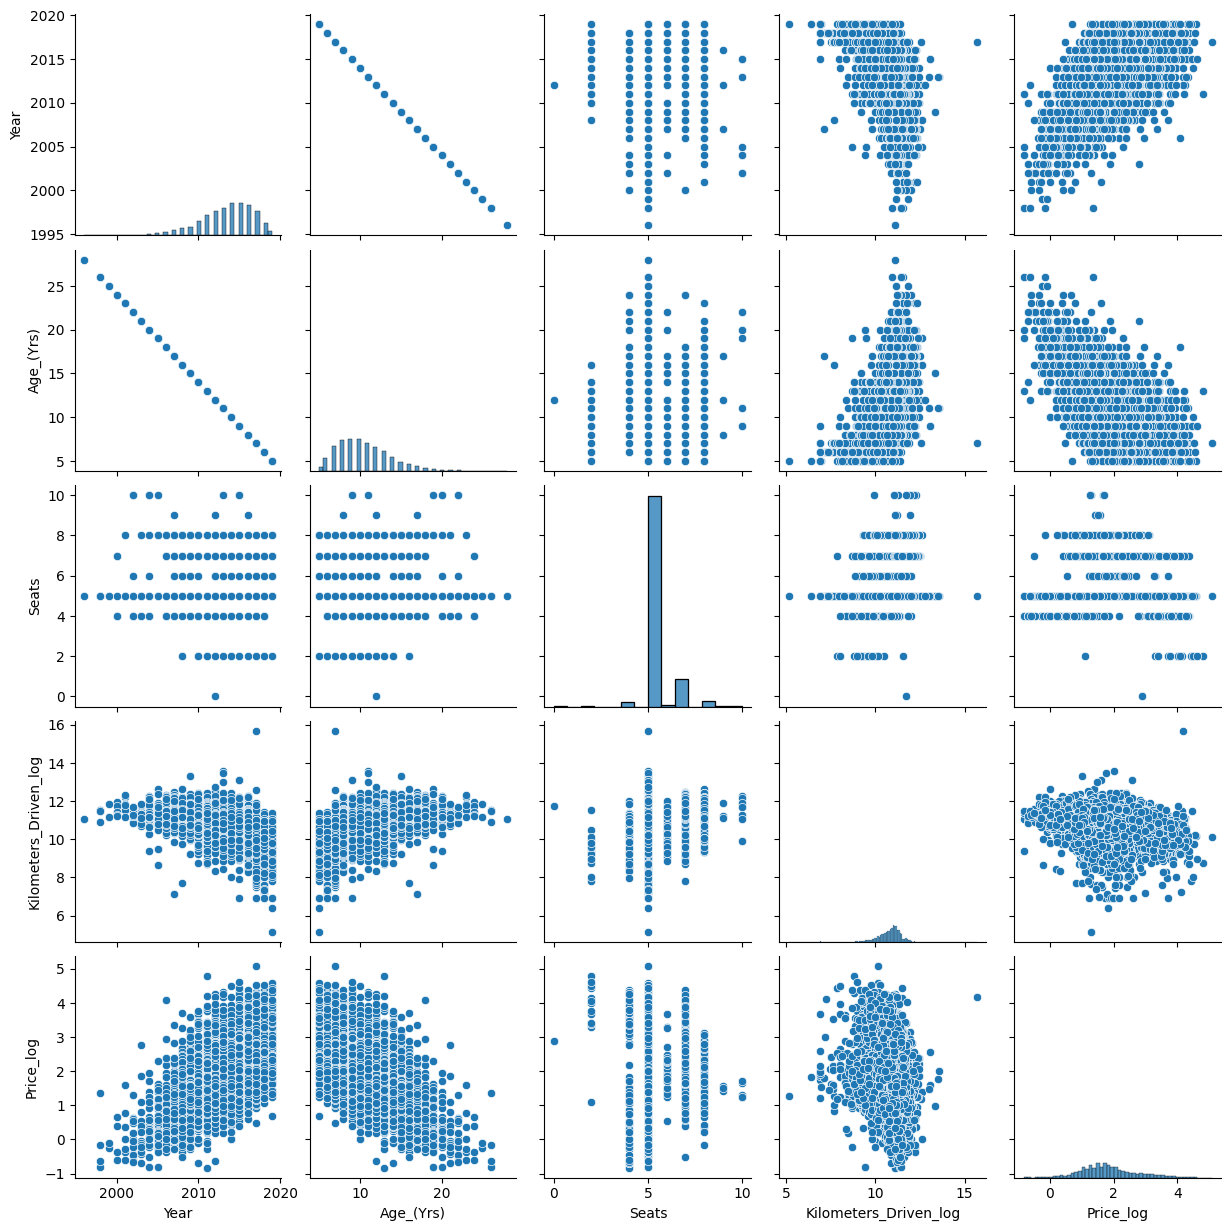

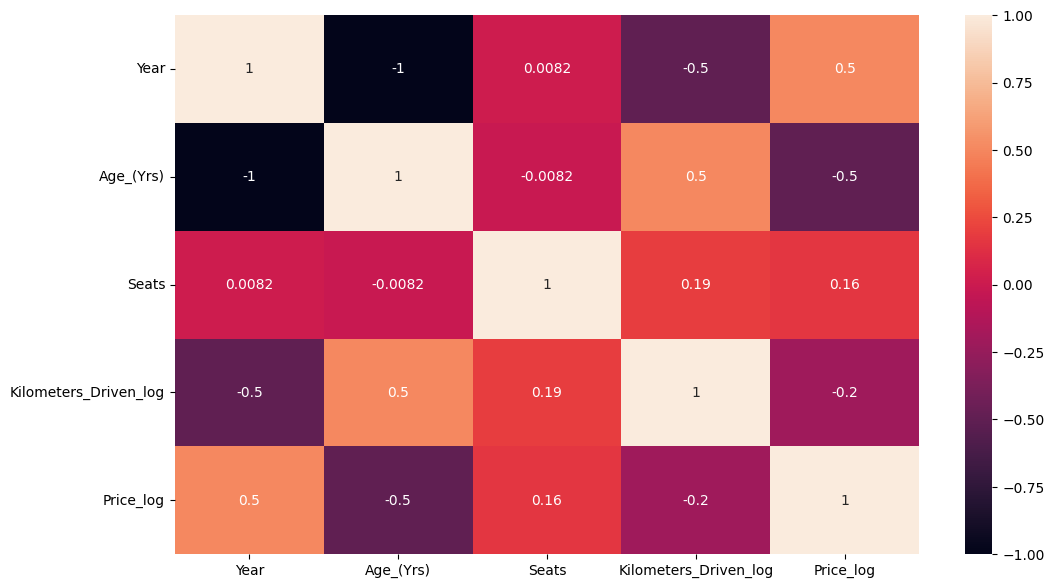

In [9]:
#reading using pd dataframe
data = pd.read_csv("used_cars_data.csv")

#EXPLORE DATA
#get the shape of the data (rows by cols)
rows, cols = data.shape
print(rows, "rows/entries")
print(cols, "columns/labels")

#head shows the first 5 entries
# data.head()

#tail shows the last 5 entries
# data.tail()

#get information about our data like labels data type and memory usage, etc
# data.info()

#get information about similarities along different axis in the dataset, in this case comparing entries in each col
data.nunique()

#sum the null (empty) elements in for each col, can also do as percentage
data.isnull().sum()
(data.isnull().sum()/(len(data)))*100 #Here we see that there is a lot of data missing about prices making this a potential dependent variable to try and predict

#FEATURE ENGINEER
#Lets drop serial number, not influential on the price
data = data.drop(["S.No."], axis=1)

#lets now change and add some features, first add car age, insert after year
data.insert(3, "Age_(Yrs)", date.today().year - data.Year)

#now break the car name into model and make and insert at front
data.insert(0, "Model", data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)) #first two words are sufficient
data.insert(0, "Make", data.Name.str.split().str.get(0)) #first two words are sufficient

#now drop the old name
data = data.drop(["Name"], axis=1)

#now search for anything weird within data that might need to be fixed before EDA, here checking brands
# print(data.Make.unique())
# print(data.Make.nunique())

#CLEAN DATA
#fix mini cooper, land rover, and isuzu brands
data["Make"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

#now model, now that we added rover and cooper to make, should remove from model:
data["Model"] = data["Model"].str.replace("Cooper", "")
data["Model"] = data["Model"].str.replace("Rover", "")

#EDA

#get general stats about the dataset
data.describe()
data.describe(include='all').T

#seperate numerical and categorical cols
categorical=data.select_dtypes(include=['object']).columns
numerical = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categorical)
print("Numerical Variables:")
print(numerical)

# data.head()

#UNIVARIATE ANALYSIS
#plot a histogram and box chart of each continous numerical variable
for col in numerical:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#plot box charts for all categorical variables
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Make', data = data, color = 'blue',
              order = data['Make'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

#log transform km drivin and price because they are very skewed and very high in value
log_transform(data,['Kilometers_Driven','Price'])
#Log transformation of the feature 'Kilometers_Driven'
sns.displot(data=data, x="Kilometers_Driven_log", kde=True)
sns.displot(data=data, x="Price", kde=True)

#Bivariate Analysis
#numerical vs numerical
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

#Multivariate analysis
#numeric as df
numeric_data = data.drop(['Kilometers_Driven','Price'], axis=1).select_dtypes(include=[float, int])

plt.figure(figsize=(12, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()
